In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import random
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split

file1 = pd.read_csv(r'C:\Users\tlghf\code\dataset\uwb_dataset_part3.csv')


df = pd.concat([file1])
df.info()

X = df.drop(["LOS"], axis=1,inplace=False)
y = df["LOS"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.5, random_state=42)
print('X_train.shape:' + str(X_train.shape))
print('y_train.shape:' + str(y_train.shape))
print('X_val.shape:' + str(X_val.shape))
print('y_val.shape:' + str(y_val.shape))
print('X_test.shape:' + str(X_test.shape))
print('y_test.shape:' + str(y_test.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 1017 entries, LOS to CIR1015
dtypes: int64(1017)
memory usage: 46.6 MB
X_train.shape:(4020, 1016)
y_train.shape:(4020,)
X_val.shape:(990, 1016)
y_val.shape:(990,)
X_test.shape:(990, 1016)
y_test.shape:(990,)


In [16]:
model = Sequential()
model.add(Dense(64, input_dim=1016, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(lr=0.002)
es = [EarlyStopping(monitor ='val_loss',mode='min',patience =20), ModelCheckpoint(filepath='best_model.h5',monitor='val_loss',save_best_only=True)]

model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_val, y_val),callbacks=[es])

C:\Users\tlghf\anaconda3\envs\lab\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/40
63/63 [==============================] - 1s 5ms/step - loss: 22.6212 - accuracy: 0.6413 - val_loss: 4.0495 - val_accuracy: 0.7141
Epoch 2/40
63/63 [==============================] - 0s 3ms/step - loss: 3.2648 - accuracy: 0.6888 - val_loss: 3.5614 - val_accuracy: 0.7394
Epoch 3/40
63/63 [==============================] - 0s 3ms/step - loss: 2.9976 - accuracy: 0.6756 - val_loss: 1.6827 - val_accuracy: 0.6495
Epoch 4/40
63/63 [==============================] - 0s 3ms/step - loss: 1.4524 - accuracy: 0.6943 - val_loss: 1.4609 - val_accuracy: 0.6081
Epoch 5/40
63/63 [==============================] - 0s 3ms/step - loss: 0.8460 - accuracy: 0.7201 - val_loss: 0.9464 - val_accuracy: 0.6778
Epoch 6/40
63/63 [==============================] - 0s 3ms/step - loss: 0.7518 - accuracy: 0.7226 - val_loss: 0.9138 - val_accuracy: 0.7253
Epoch 7/40
63/63 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.7204 - val_loss: 0.8588 - val_accuracy: 0.7303
Epoch 8/40
63/63 [=

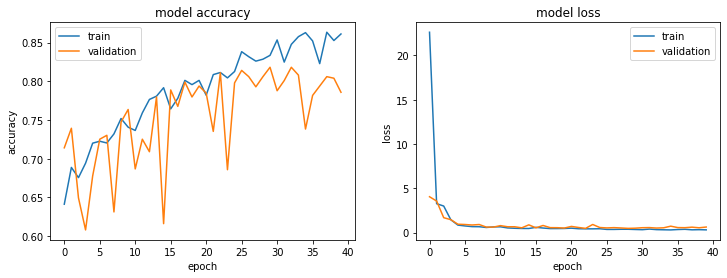

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])

16/16 [==============================] - 0s 5ms/step - loss: 0.6243 - accuracy: 0.7828
Test loss_and_accuracy : [0.6242568492889404, 0.7828282713890076]
y_test:2465    0
2746    0
2577    0
2997    1
4559    1
       ..
776     0
2145    1
4190    0
334     0
4280    1
Name: LOS, Length: 990, dtype: int64
y_pred:[[-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [ 1.]
 [-0.]
 [-0.]
 [-0.]
 [ 1.]
 [ 1.]
 [-0.]
 [ 1.]
 [-0.]
 [ 1.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [ 1.]
 [-0.]
 [-0.]
 [ 1.]
 [-0.]
 [-0.]
 [ 1.]
 [-0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [ 1.]
 [-0.]
 [ 1.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [ 1.]
 [ 1.]
 [-0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [ 1.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [ 1.]
 [-0.]
 [-0.]
 [ 1.]
 [ 1.]
 [-0.]
 [-0.]
 [-0.]
 [ 1.]
 [ 1.]
 [-0.]
 [ 1.]
 [-0.]
 [ 1.]
 [ 1.]
 [-0.]
 [-0.]
 [-0.]
 [ 1.]
 [-0.]
 [ 1.]
 [-0.]
 [ 1.]
 [-0.]
 [-0.]
 [ 1.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]


<AxesSubplot:>

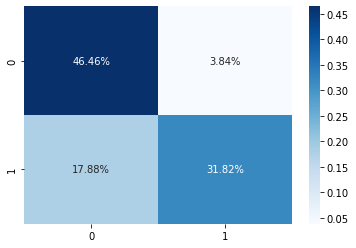

In [18]:
import seaborn as sns

loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('Test loss_and_accuracy : ' + str(loss_and_metrics))

y_pred = model.predict(X_test)
y_pred = np.ceil(y_pred-0.5)
print('y_test:' + str(y_test))
print('y_pred:' + str(y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
print('cf_matrix:' + str(cf_matrix))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt = '.2%', cmap='Blues')

##mse = mean_squared_error(y_test, y_pred) 
##rmse = np.sqrt(mse)
##print('mse:' + str(mse))
##print('rmse:' + str(rmse))

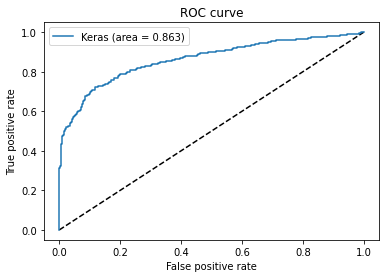

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()